# Reinforcement learning 
## Missionary Cannibal problem 

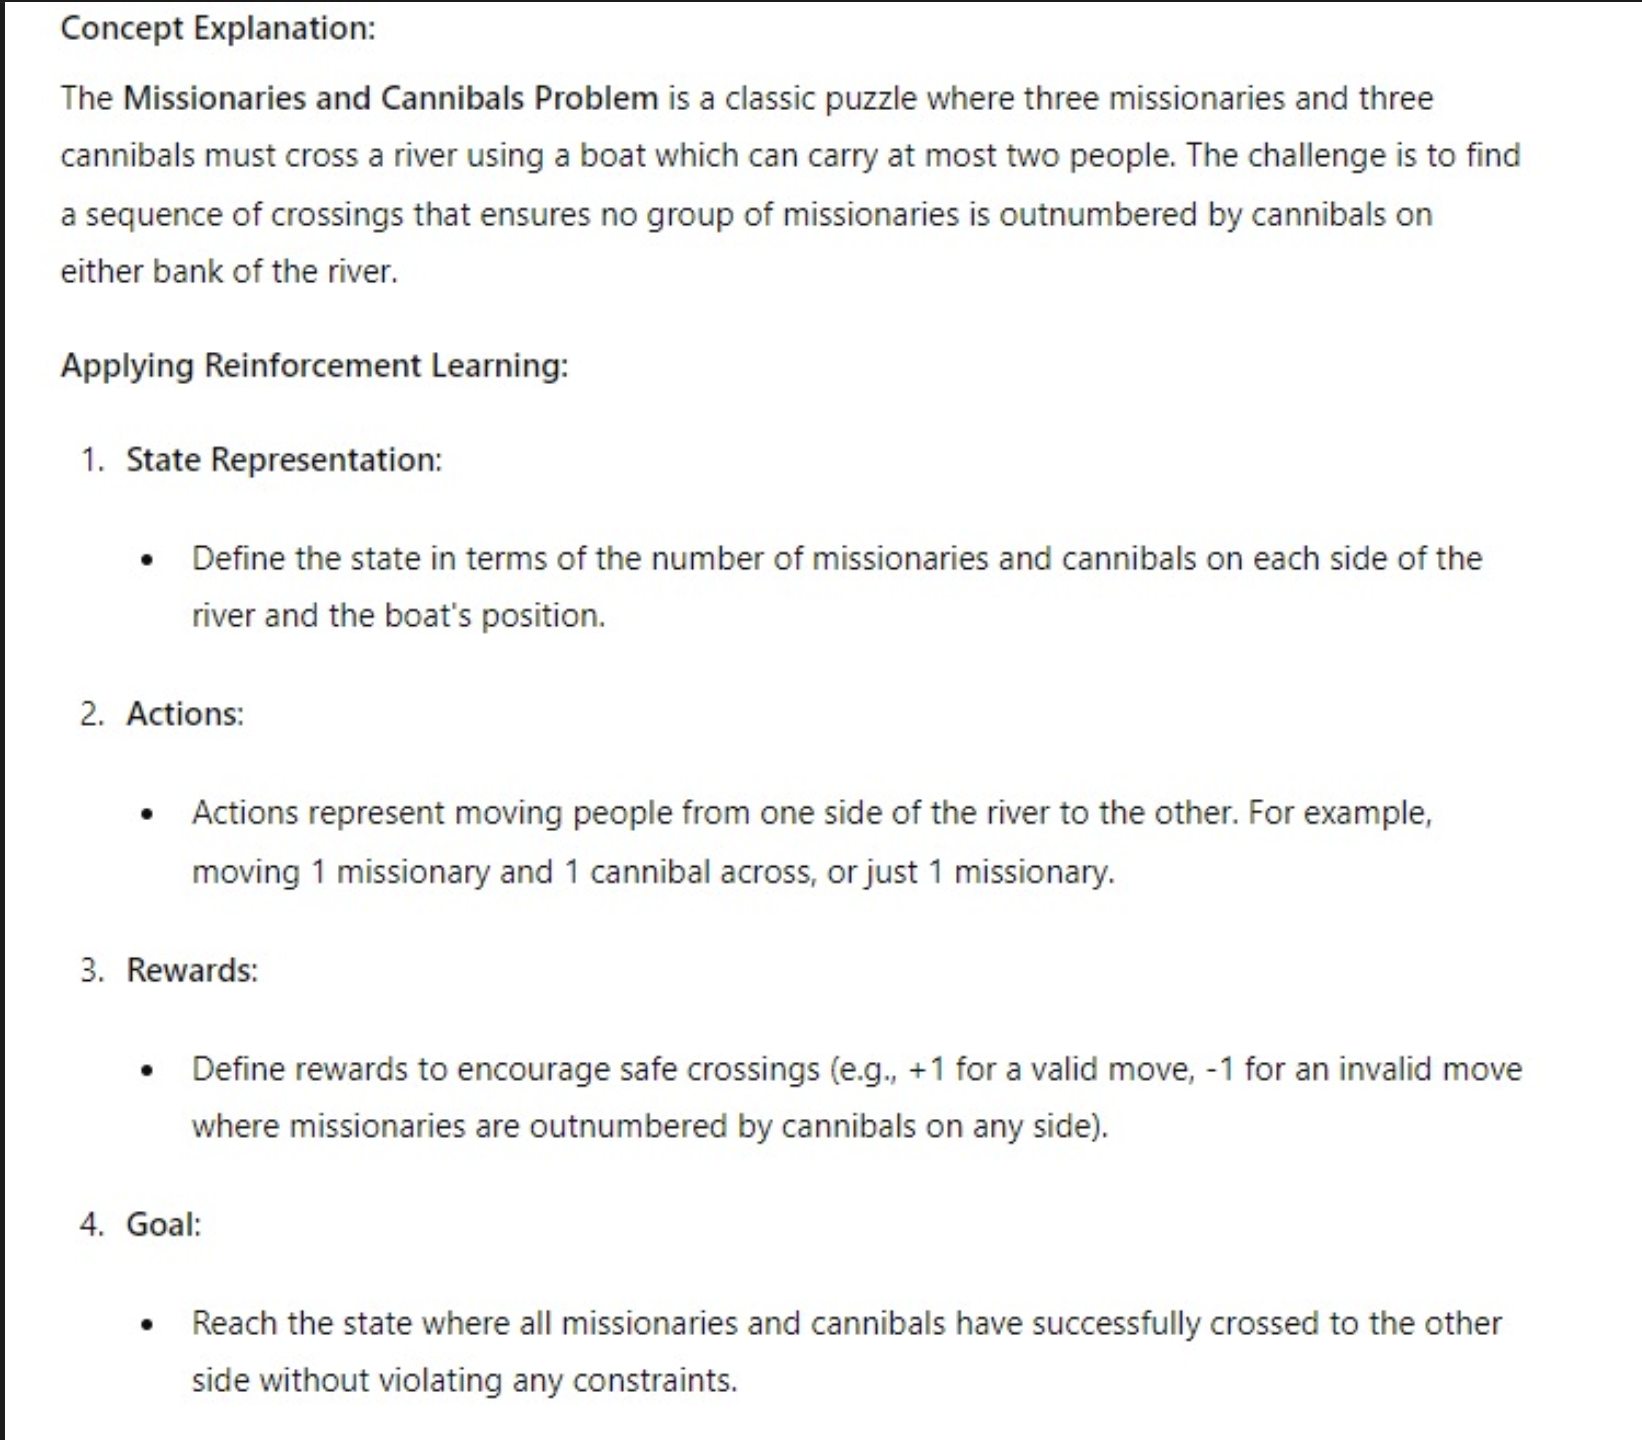

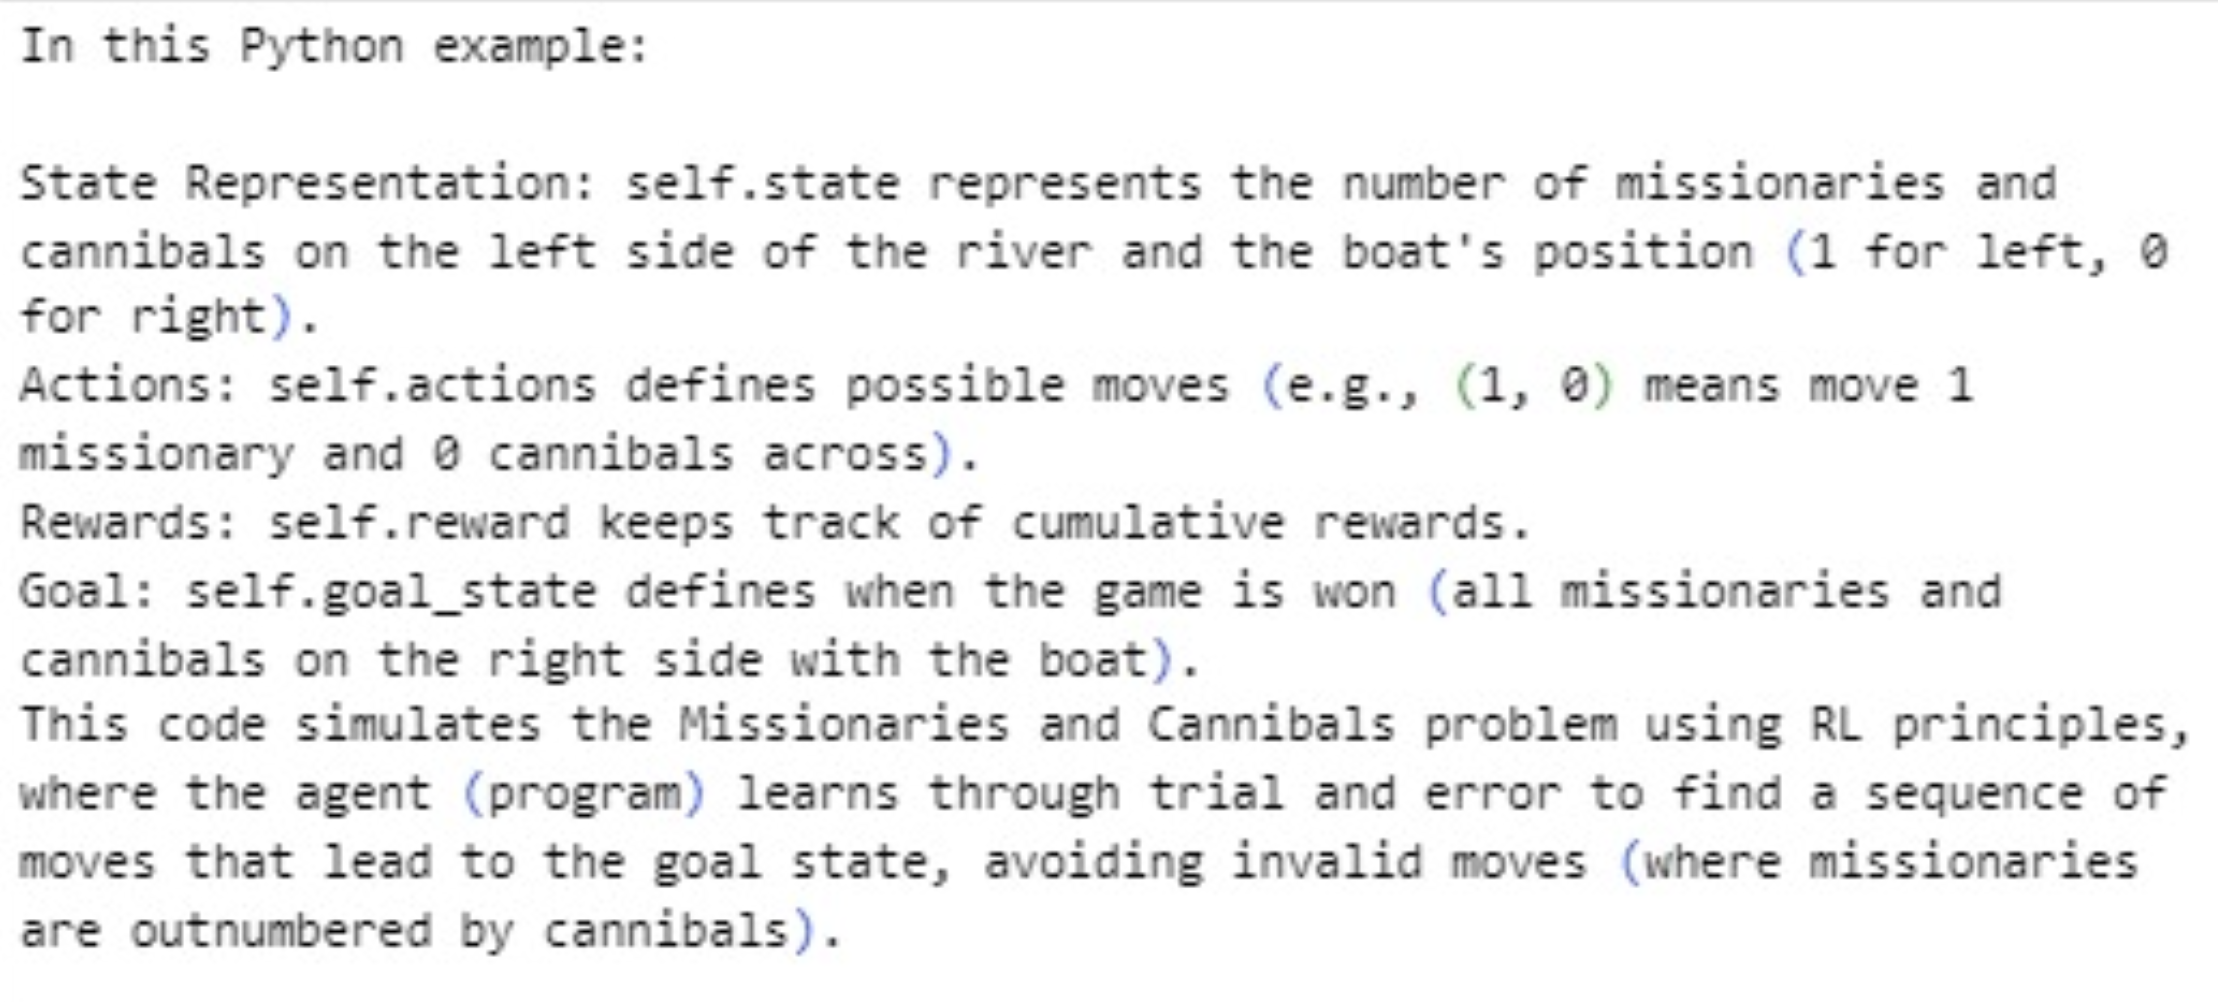

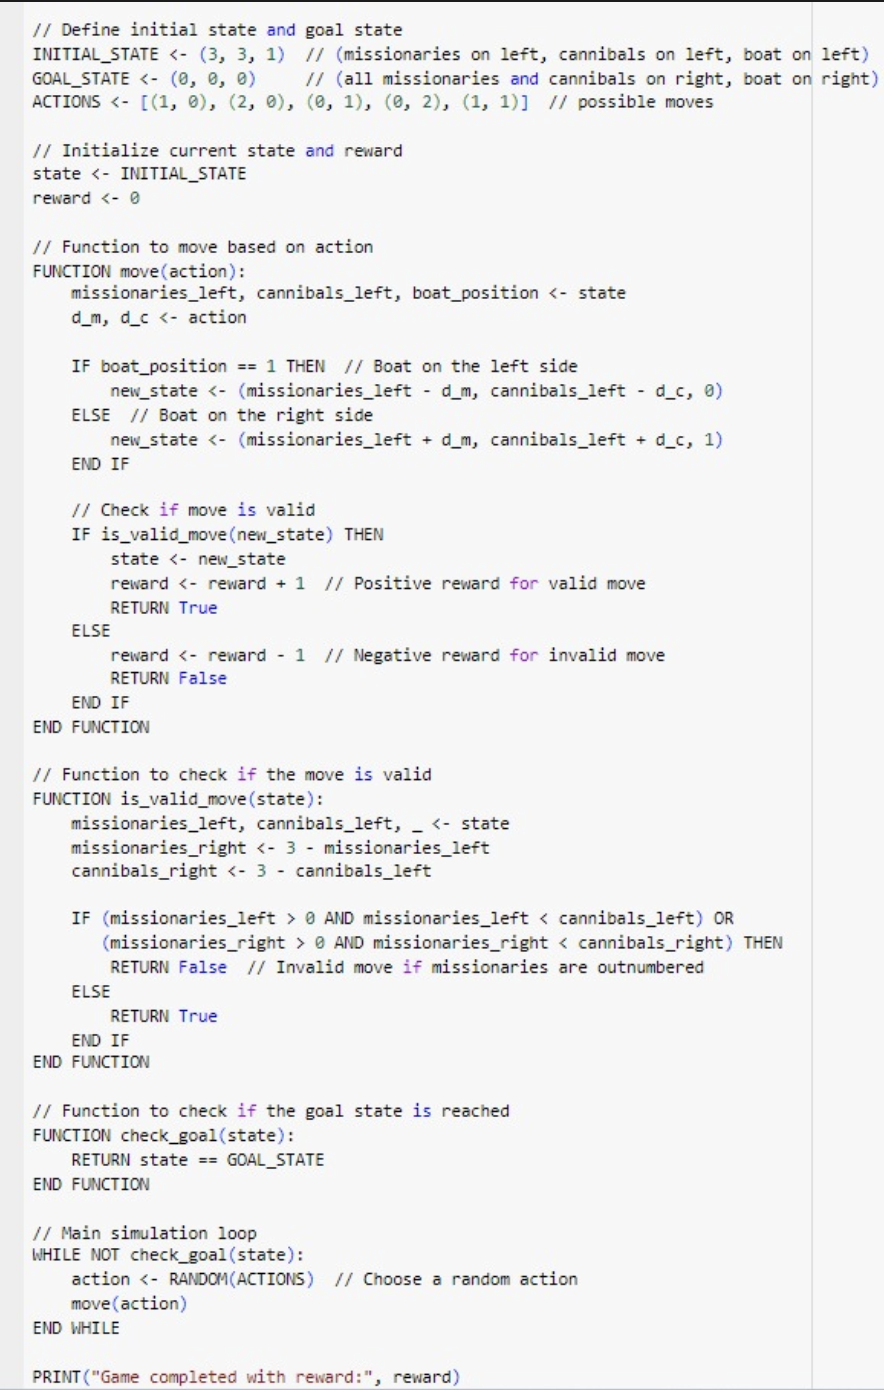

In [4]:
import random

class Missionaries_cannibals:
    def __init__(self):
        self.state = (3,3,1)  # (missionaries-left ,cannibals-left ,boat position on left )
        self.action = [(1,0),(2,0),(0,1),(0,2),(1,1)] # possible moves 
        self.goal_state = (0,0,0) #(missionaries - right , cannibals - right , boat position on right)
        self.reward = 0

    def move(self, action):
        missionaries_left, cannibals_left, boat_possition = self.state
        d_m, d_c = action
        if boat_possition == 1:  # boat is on the left side
            new_state = (missionaries_left - d_m, cannibals_left - d_c, 0)
        else:  # boat is on the right side
            new_state = (missionaries_left + d_m, cannibals_left + d_c, 1)

        # Check if the move is valid
        if self.is_valid_move(new_state):
            self.state = new_state
            # High reward for reaching the goal state
            if new_state == self.goal_state:
                self.reward = 100
            else:
                self.reward = 1  # positive reward for valid moves
            return True
        else:
            self.reward = -2  # negative reward for invalid moves
            return False

    def is_valid_move(self, state):
        missionary_left, cannibals_left, _ = state
        missionary_right = 3 - missionary_left
        cannibals_right = 3 - cannibals_left

        if (missionary_left > 0 and missionary_left < cannibals_left) or (missionary_right > 0 and missionary_right < cannibals_right):
            return False  # missionaries are outnumbered by cannibals 
        else:
            return True

# Example usage
env = Missionaries_cannibals()
# Randomly explore some moves
for _ in range(10):
    action = random.choice(env.action)
    env.move(action)
    print(f"State: {env.state}, Reward: {env.reward}")

# (Replace this with your actual reinforcement learning algorithm here)
# This would involve learning a policy based on states, actions, and rewards


State: (3, 3, 1), Reward: -2
State: (3, 2, 0), Reward: 1
State: (5, 2, 1), Reward: 1
State: (5, 0, 0), Reward: 1
State: (6, 0, 1), Reward: 1
State: (6, -1, 0), Reward: 1
State: (6, 1, 1), Reward: 1
State: (5, 0, 0), Reward: 1
State: (6, 0, 1), Reward: 1
State: (5, 0, 0), Reward: 1


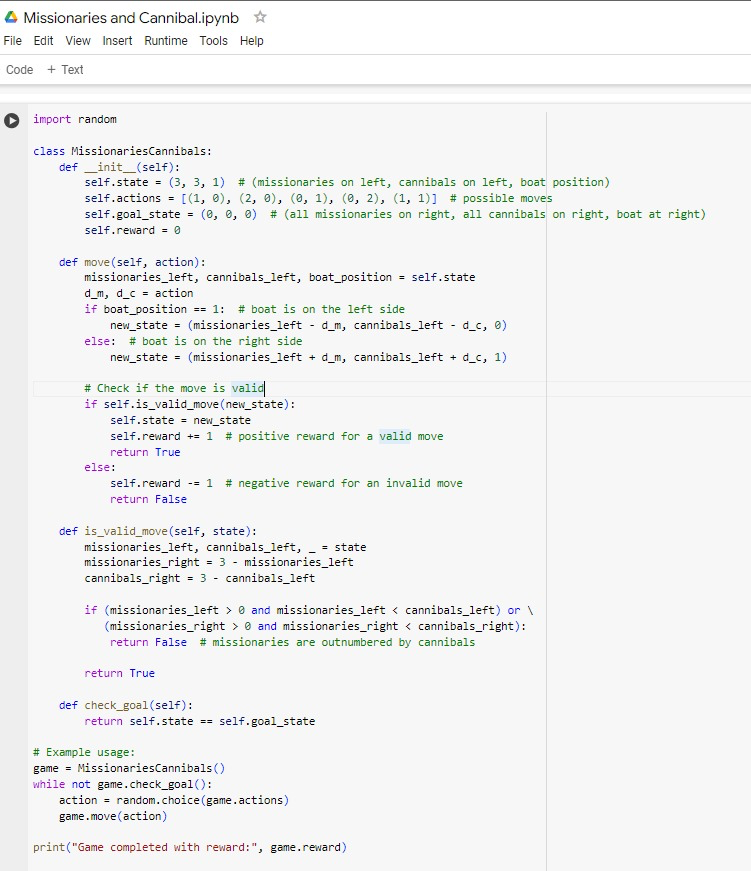

Absolutely, let's break down the code line by line:

**Lines 1-2:**

```python
import random

class Missionaries_cannibals:
```

- This line imports the `random` library, which will be used to pick random actions later.
- The next line defines a class called `Missionaries_cannibals`. This class represents the environment for the Missionaries and Cannibals problem.

**Lines 4-8:**

```python
def __init__(self):
    self.state = (3,3,1)  # (missionaries-left ,cannibals-left ,boat position on left )
    self.action = [(1,0),(2,0),(0,1),(0,2),(1,1)] # possible moves 
    self.goal_state = (0,0,0) #(missionaries - right , cannibals - right , boat position on right)
    self.reward = 0
```

- This defines a special function called `__init__`, which is called automatically whenever you create a new object of this class (like creating a new game instance).
- Inside `__init__`, it sets up several attributes for the game:
    - `self.state`: This is a tuple that represents the current state of the game. It contains three values:
        - Number of missionaries on the left side of the river. (3 initially)
        - Number of cannibals on the left side of the river. (3 initially)
        - Boat position (1 means boat is on the left, 0 for right). (1 initially)
    - `self.action`: This is a list of tuples that represent all the possible moves. Each tuple represents the number of missionaries (first element) and cannibals (second element) that can move together in a single trip.
    - `self.goal_state`: This is a tuple that represents the goal state where you want to reach. All missionaries and cannibals are on the right side with the boat (0 missionaries, 0 cannibals, and boat position 0 on the right).
    - `self.reward`: This keeps track of the total reward received so far.

**Lines 10-22:**

```python
def move(self, action):
    missionaries_left, cannibals_left, boat_possition = self.state
    d_m, d_c = action
    if boat_possition == 1:  # boat is on the left side
        new_state = (missionaries_left - d_m, cannibals_left - d_c, 0)
    else:  # boat is on the right side
        new_state = (missionaries_left + d_m, cannibals_left + d_c, 1)

    # Check if the move is valid
    if self.is_valid_move(new_state):
        self.state = new_state
        # High reward for reaching the goal state
        if new_state == self.goal_state:
            self.reward = 100
        else:
            self.reward = 1  # positive reward for valid moves
        return True
    else:
        self.reward = -2  # negative reward for invalid moves
        return False
```

- This defines a function called `move`. This function takes an `action` (a tuple from `self.action`) as input and simulates moving the missionaries and cannibals based on that action.
    - It unpacks the current state information into separate variables.
    - It unpacks the `action` tuple into the number of missionaries (`d_m`) and cannibals (`d_c`) to move.
    - Depending on the boat position (`boat_possition`), it calculates the new state after the move (number of missionaries and cannibals on the left side and the updated boat position).
    - It then calls the `is_valid_move` function to check if the move is allowed.
        - If the move is valid, it updates the `self.state` with the new state and assigns a reward:
            - High reward (100) for reaching the goal state.
            - Small reward (1) for other valid moves.
        - If the move is invalid (e.g., too many cannibals or missionaries left behind), it assigns a negative reward (-2).
    - Finally, the function returns `True` if the move was successful and `False` otherwise.

**Lines 24-29:**

```python
def is_valid_move(self, state):
    missionary_